In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5

In [22]:
def get_lower_and_upper_bounds(s, multiplier):
    q1 = df[s].quantile(0.25)
    q3 = df[s].quantile(0.75)
    iqr = q3 - q1
    inner_lower_fence = q1 - (multiplier * iqr)
    inner_upper_fence = q3 + (multiplier * iqr)
    return inner_lower_fence, inner_upper_fence

1. Using lemonage.csv dataset and focusing on continuous variables:
    - Use IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [9]:
df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv")


In [10]:
df

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [16]:
df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date').sort_index()
df

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-02,Monday,28.9,1.33,15,0.5,13
2017-01-03,Tuesday,34.5,1.33,27,0.5,15
2017-01-04,Wednesday,44.1,1.05,28,0.5,17
2017-01-05,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...
2017-12-27,Wednesday,42.7,1.00,33,0.5,19
2017-12-28,Thursday,37.8,1.25,32,0.5,16
2017-12-29,Friday,39.5,1.25,17,0.5,15


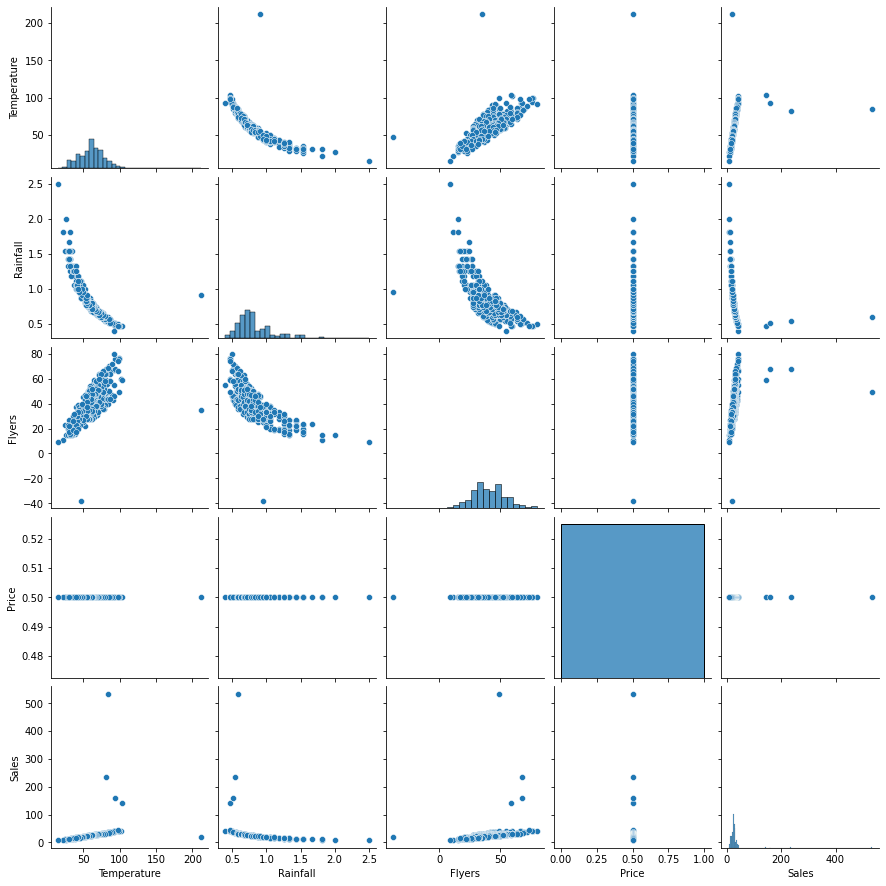

In [19]:
sns.pairplot(df)

""


In [29]:
iqr_df = pd.DataFrame()
# iterate through columns
for col in df.columns:
#     determine that it is a number type
    if np.issubdtype(df[col].dtype, np.number):
        l, u = get_lower_and_upper_bounds(col, 1.5)
        x = df[(df[col] < l) | (df[col] > u)]
        x['Outlier'] = col
        x['Multiplier'] = 1.5
        iqr_df = pd.concat([iqr_df, x])
        
        l, u = get_lower_and_upper_bounds(col, 3)
        x = df[(df[col] < l) | (df[col] > u)]
        x['Outlier_Column'] = col
        x['Multiplier'] = 3
        iqr_df = pd.concat([iqr_df, x])
        
iqr_df

,Day,Temperature,Rainfall,Flyers,Price,Sales,Outlier,Multiplier
Date,,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,Temperature,1.5
2017-12-31,Sunday,15.1,2.50,9,0.5,7,Temperature,1.5
2017-02-11,Saturday,212.0,0.91,35,0.5,21,Temperature,3.0
2017-01-01,Sunday,27.0,2.00,15,0.5,10,Rainfall,1.5
2017-01-02,Monday,28.9,1.33,15,0.5,13,Rainfall,1.5
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,Rainfall,1.5
2017-01-06,Friday,25.3,1.54,23,0.5,11,Rainfall,1.5
2017-01-07,Saturday,32.9,1.54,19,0.5,13,Rainfall,1.5
2017-01-11,Wednesday,32.6,1.54,23,0.5,12,Rainfall,1.5


In [30]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


### Temperature
- The higest temp recorded in the world is 56.7C or 134F
- The lowest temp recorded in the world is -89.2C or -128.6F
- Any temps above or below these values should be considered unrealistic and classified as outliers.

### Rainfall
- Because there is no unit of measurement given, a difference of 1 or 2 units does not seem that far fetched if is in or cm
- I would not removed any rows due to rainfall

### Flyers
- I have no context for what a negative number of flyers means so I would remove that row

### Price
- Price is consistent, so I wouldn't remove any rows. I would fill in the value for any NaNs.

### Sales
- Sales is my target variable, so I would't consider any rows in Sales as outliers unless the value present was something other than a number. 

2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:
- Use a 2 sigma decision rule to isolate the outliers.
    - Do these make sense?
    - Should certain outliers be kept or removed?

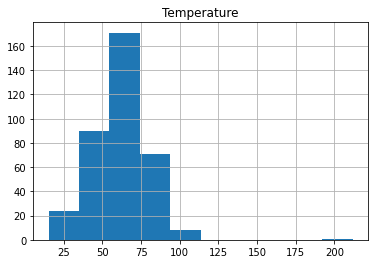

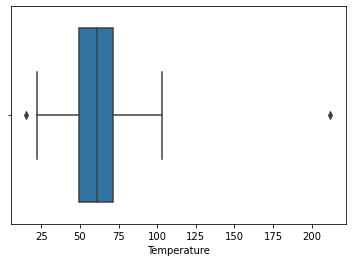

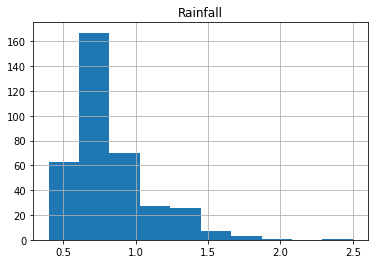

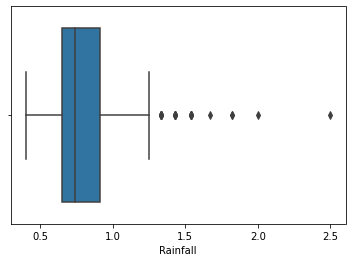

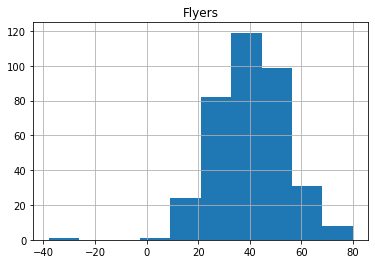

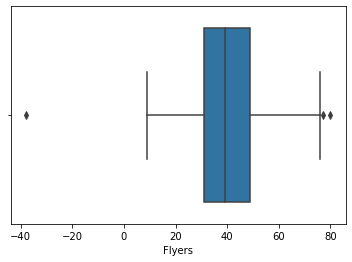

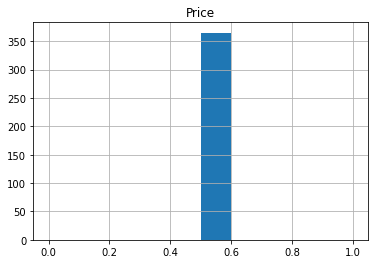

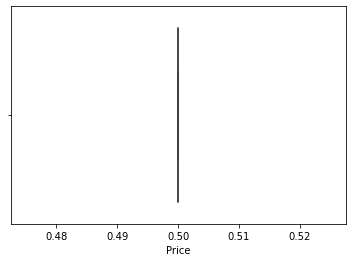

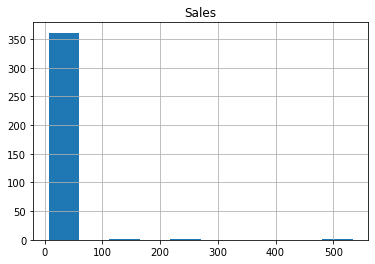

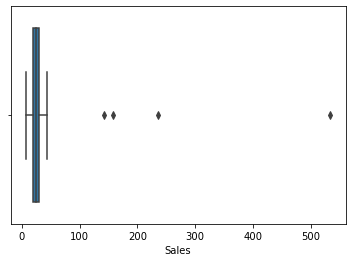

In [31]:
# iterate through columns
for col in df.columns:
#     determine that it is a number type
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        plt.title(col)
        plt.show()
        sns.boxplot(data=df, x=col)
        plt.show()

In [36]:
# Temperature, Rainfall, and Flyers are normally distributed columns.

for x in df[['Temperature', 'Rainfall', 'Flyers']]:
    print(x)
    print('Standard Deviation greater than 2')
    s= df[x]
    # Calculate the z-score 
    zscores = pd.Series((s - s.mean()) / s.std())

    # Finds all of the observations two standard deviations or more.
    print(s[zscores.abs() >= 2])

Temperature
Standard Deviation greater than 2
Date
2017-02-11    212.0
2017-06-16     99.3
2017-06-26    102.6
2017-07-01    102.9
2017-07-10     98.0
2017-07-18     99.3
2017-07-22     99.6
2017-07-27     97.9
2017-12-05     22.0
2017-12-31     15.1
Name: Temperature, dtype: float64
Rainfall
Standard Deviation greater than 2
Date
2017-01-01    2.00
2017-01-06    1.54
2017-01-07    1.54
2017-01-11    1.54
2017-01-16    1.67
2017-01-17    1.43
2017-01-20    1.43
2017-01-24    1.54
2017-12-04    1.54
2017-12-05    1.82
2017-12-09    1.43
2017-12-10    1.82
2017-12-13    1.43
2017-12-14    1.54
2017-12-18    1.43
2017-12-22    1.54
2017-12-26    1.43
2017-12-30    1.43
2017-12-31    2.50
Name: Rainfall, dtype: float64
Flyers
Standard Deviation greater than 2
Date
2017-06-16    77
2017-06-20    70
2017-06-21    76
2017-07-02    68
2017-07-03    68
2017-07-14    80
2017-07-18    76
2017-07-23    72
2017-07-24    69
2017-07-27    74
2017-11-21   -38
2017-12-05    11
2017-12-31     9
Name: Fl

### Temperature
- I would consider the 212 as an outlier and leave the others

### Rainfall
- None of those values look like signifanct outliers

### Flyers
- I would drop the negative value and leave the others

3. Use a 3 sigma decision rule to isolate the ouliers

In [39]:
# Temperature, Rainfall, and Flyers are normally distributed columns.

for x in df[['Temperature', 'Rainfall', 'Flyers']]:
    print(x)
    print('Standard Deviation greater than 3')
    s= df[x]
    # Calculate the z-score 
    zscores = pd.Series((s - s.mean()) / s.std())

    # Finds all of the observations two standard deviations or more.
    print(s[zscores.abs() >= 3])
    print("----------------")

Temperature
Standard Deviation greater than 3
Date
2017-02-11    212.0
Name: Temperature, dtype: float64
----------------
Rainfall
Standard Deviation greater than 3
Date
2017-01-01    2.00
2017-01-16    1.67
2017-12-05    1.82
2017-12-10    1.82
2017-12-31    2.50
Name: Rainfall, dtype: float64
----------------
Flyers
Standard Deviation greater than 3
Date
2017-11-21   -38
Name: Flyers, dtype: int64
----------------
